In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 4.5, 3.2

# Create Data Set

In [4]:
num_category = 5

In [5]:
# probability
prob_prop = np.array([1,5,7,3,1])
prob = prob_prop / prob_prop.sum()
prob # this is a sampling distribution in this example

array([ 0.05882353,  0.29411765,  0.41176471,  0.17647059,  0.05882353])

# Slice-Sampling

In [6]:
num_sampling = 5000
chain = np.zeros((num_sampling, 1, 1))
chain[0][0][0] = int(npr.multinomial(1, np.repeat(1/num_category, num_category)).nonzero()[0]) # initial group index
w = 1
num_above_slice = []

for i in range(0, num_sampling-1):
    u = npr.uniform(0, prob[int(chain[i][0][0])])
        
    chain[i+1][0][0] = np.random.choice(np.where(prob > u)[0]) # draw uniformly from categories that are above u  

In [7]:
prob_prop

array([1, 5, 7, 3, 1])

In [8]:
prob # ans

array([ 0.05882353,  0.29411765,  0.41176471,  0.17647059,  0.05882353])

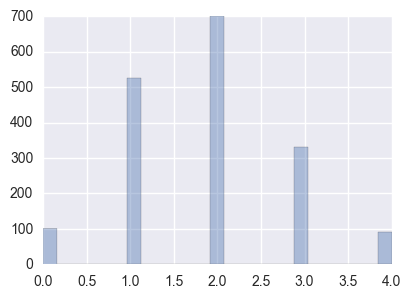

In [9]:
sns.distplot(chain[int(num_sampling * 0.65): , 0, 0], hist=True, kde=False)